# MERGING DATASETS

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

# Load the datasets into separate DataFrames
df_2016 = pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BATTING STATS - IPL_2016.csv")
df_2017 = pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BATTING STATS - IPL_2017.csv")
df_2018 = pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BATTING STATS - IPL_2018.csv")
df_2019 = pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BATTING STATS - IPL_2019.csv")
df_2020 = pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BATTING STATS - IPL_2020.csv")
df_2021 = pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BATTING STATS - IPL_2021.csv")
df_2022 = pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BATTING STATS - IPL_2022.csv")
df = pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020, df_2021], ignore_index=True)
df_2016['HS'] = df_2016['HS'].str.replace('*', '').astype(int)
df_2017['HS'] = df_2017['HS'].str.replace('*', '').astype(int)
df_2018['HS']=df_2018['HS'].str.replace('*', '').astype(int)
df_2019['HS']=df_2019['HS'].str.replace('*', '').astype(int)
df_2020['HS']=df_2020['HS'].str.replace('*', '').astype(int)
df_2021['HS']=df_2021['HS'].str.replace('*', '').astype(int)
df_2022['HS']=df_2022['HS'].str.replace('*', '').astype(int)
# Group the DataFrame by player name and calculate the sum of runs, number of innings played, number of not outs, number of 100s, number of 50s, number of 4s, and number of 6s
grouped_df = df.groupby('Player', as_index=False).agg({'Mat': 'sum', 'Inns': 'sum', 'NO': 'sum', 'Runs': 'sum', 'BF': 'sum', '100': 'sum', '50': 'sum', '4s': 'sum', '6s': 'sum', 'HS': 'max'})
# Calculate average and strike rate
grouped_df['Avg'] = grouped_df['Runs'] / grouped_df['Inns']
grouped_df['SR'] = (grouped_df['Runs'] / grouped_df['BF']) * 100
grouped_df.to_csv("iplbatting.csv",index=False)

In [3]:
import pandas as pd

df_2016b = pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BOWLING STATS - IPL_2016.csv")
df_2017b = pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BOWLING STATS - IPL_2017.csv")
df_2018b = pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BOWLING STATS - IPL_2018.csv")
df_2019b = pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BOWLING STATS - IPL_2019.csv")
df_2020b = pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BOWLING STATS - IPL_2020.csv")
df_2021b = pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BOWLING STATS - IPL_2021.csv")
df_2022b = pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BOWLING STATS - IPL_2022.csv")

bowling_data = pd.concat([df_2016b, df_2017b, df_2018b, df_2019b, df_2020b, df_2021b, df_2022b])

bowling_data = bowling_data.groupby(['Player']).agg({'Mat': 'sum',
                                                    'Inns': 'sum',
                                                    'Ov': 'sum',
                                                    'Runs': 'sum',
                                                    'Wkts': 'sum',
                                                    '4w': 'sum',
                                                    '5w': 'sum'})

# Calculate the averages, economy rates and strike rates
bowling_data['Avg'] = bowling_data['Runs'] / bowling_data['Wkts']
bowling_data['Econ'] = bowling_data['Runs'] / bowling_data['Ov'] * 6
bowling_data['SR'] = bowling_data['Ov'] / bowling_data['Wkts']

bowling_data = bowling_data.sort_values(by='Wkts', ascending=False)
bowling_data.to_csv("iplbowling.csv")


# SPLITTING DATASETS

In [5]:
import pandas as pd
df = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\IPL dataset forp (1).csv")
df['TEAM'] = df['TEAM'].str.strip()
unique_countries = df['TEAM'].unique()
# print(unique_countries)
roles = df['Paying_Role'].unique()
for role in roles:
    role_data = df[df['Paying_Role'] == role]
    role_data.to_csv(f'{role}.csv', index=False)


# BATTING PREPROCESSING

['IND' 'NZ' 'AUS' 'WI' 'SA' 'ENG' 'SL']
Most effecting to least
 SOLD_PRICE       1.000000
6s               0.764969
Runs             0.672097
BF               0.660885
HS               0.655726
Inns             0.645030
50s              0.642389
4s               0.630206
Mat              0.624479
TBF              0.579911
T4s              0.572924
TRuns            0.558910
Avg              0.539722
T50s             0.536843
TInns            0.532264
CAPTAINCY EXP    0.528023
TMat             0.521686
100s             0.496036
NO               0.488902
0s               0.444464
T0s              0.433109
TNO              0.409391
T6s              0.367806
TAvg             0.240039
T100s            0.234795
TSR              0.199688
TEAM             0.146253
SR               0.071844
AGE              0.063671
THS              0.050873
COUNTRY          0.037559
Name: SOLD_PRICE, dtype: float64


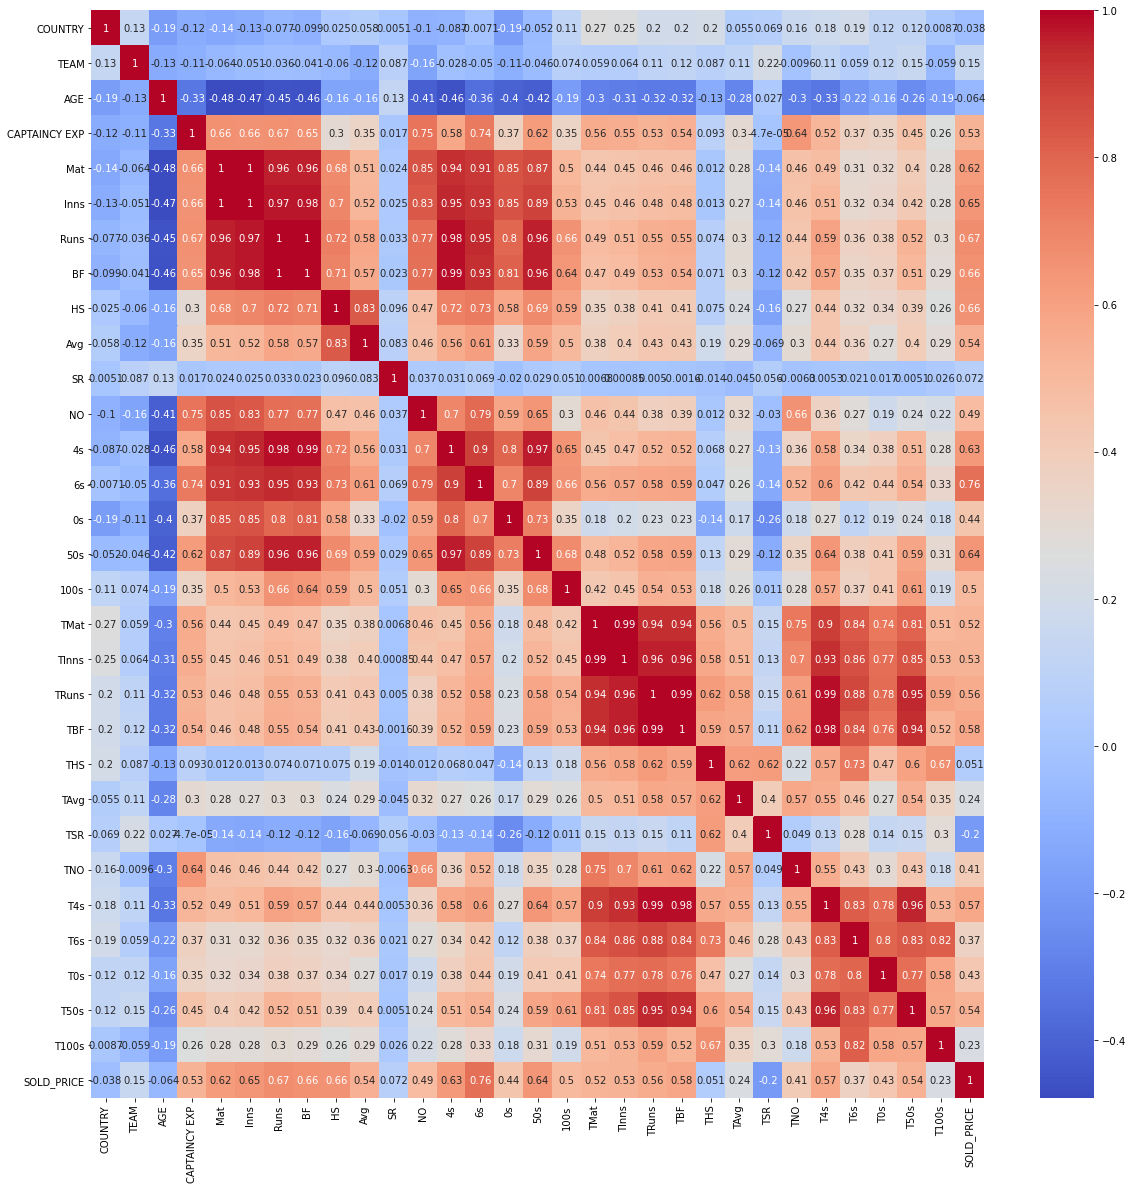

In [7]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
df_bat=pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\Batting.csv")
df_bat= df_bat.drop(['POS_x','Paying_Role','Star_Rating','B_Inns','B_Balls','B_Runs','B_Maidens','B_Wkts','B_Avg','B_Econ','B_SR','B_4w','B_5w','B_TInns','B_Balls.1','B_TRuns','B_TMaidens','B_TWkts','B_TAvg','B_TEcon','B_TSR','B_T4w','B_T5w'], axis=1)

df_bat['COUNTRY'] = df_bat['COUNTRY'].str.strip()
unique_countries = df_bat['COUNTRY'].unique()

print(unique_countries)
country_dict = {country: i for i, country in enumerate(unique_countries)}
df_bat['COUNTRY'] = df_bat['COUNTRY'].map(country_dict)

unique_team = df_bat['TEAM'].unique()
team_dict = {team: i for i,team in enumerate(unique_team)}
df_bat['TEAM'] = df_bat['TEAM'].map(team_dict)

age_dict = {15: 50, 16: 50, 17: 50, 18: 50, 19: 50, 20: 50, 21: 50, 22: 50,
            23: 100, 24: 100, 25: 100, 26: 100, 27: 100, 28: 100, 29: 100, 30: 100,
            31: 55, 32: 55, 33: 55,
            34: 30, 35: 30, 36: 30, 37: 30, 38: 30, 39: 30, 40: 30, 41: 30, 42: 30}
df_bat['AGE'] = df_bat['AGE'].apply(lambda x: age_dict[x])

def convert_units(val):
    if val.endswith('cr'):
        return float(val[:-2]) * 10000000  # 1 crore = 10000000
    elif val.endswith('l'):
        return float(val[:-1]) * 100000  # 1 lakh = 100000
    else:
        return None
df_bat['SOLD_PRICE'] = df_bat['SOLD_PRICE'].apply(convert_units)
df_bat.replace('', np.nan, inplace=True)
df_bat=df_bat.sort_values("SOLD_PRICE", ascending=False)
df_bat=df_bat.ffill()
df_bat.to_csv("model_bat.csv")


corr_matrix = df_bat.corr()

high_corr = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            high_corr.add(colname)

df_bat.drop(high_corr, axis=1, inplace=True)


# high_target_corr = target_corr[target_corr > 0.5]

corr_abs = abs(corr_matrix['SOLD_PRICE'])
sorted_corr = corr_abs.sort_values(ascending=False)


# print the sorted correlations
print("Most effecting to least\n",sorted_corr)

plt.figure(figsize=(20,20))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

# x=df_all["AGE"].mean()
# print(x)

# BOWLING PREPROCESSING 

Most effecting to least
 SOLD_PRICE       1.000000
B_Wkts           0.507908
B_TEcon          0.474139
B_Balls          0.471327
B_Runs           0.467277
B_Inns           0.453005
Mat              0.445544
B_TMaidens       0.394080
B_Maidens        0.361471
B_Balls.1        0.352352
B_TInns          0.351275
B_TWkts          0.342373
B_TRuns          0.340545
B_4w             0.340321
B_T4w            0.319886
B_TSR            0.254780
B_Avg            0.223632
TEAM             0.220196
B_5w             0.178687
B_SR             0.159291
B_TAvg           0.134687
B_Econ           0.105073
B_T5w            0.089254
CAPTAINCY EXP    0.046436
AGE              0.021742
COUNTRY          0.000819
Name: SOLD_PRICE, dtype: float64


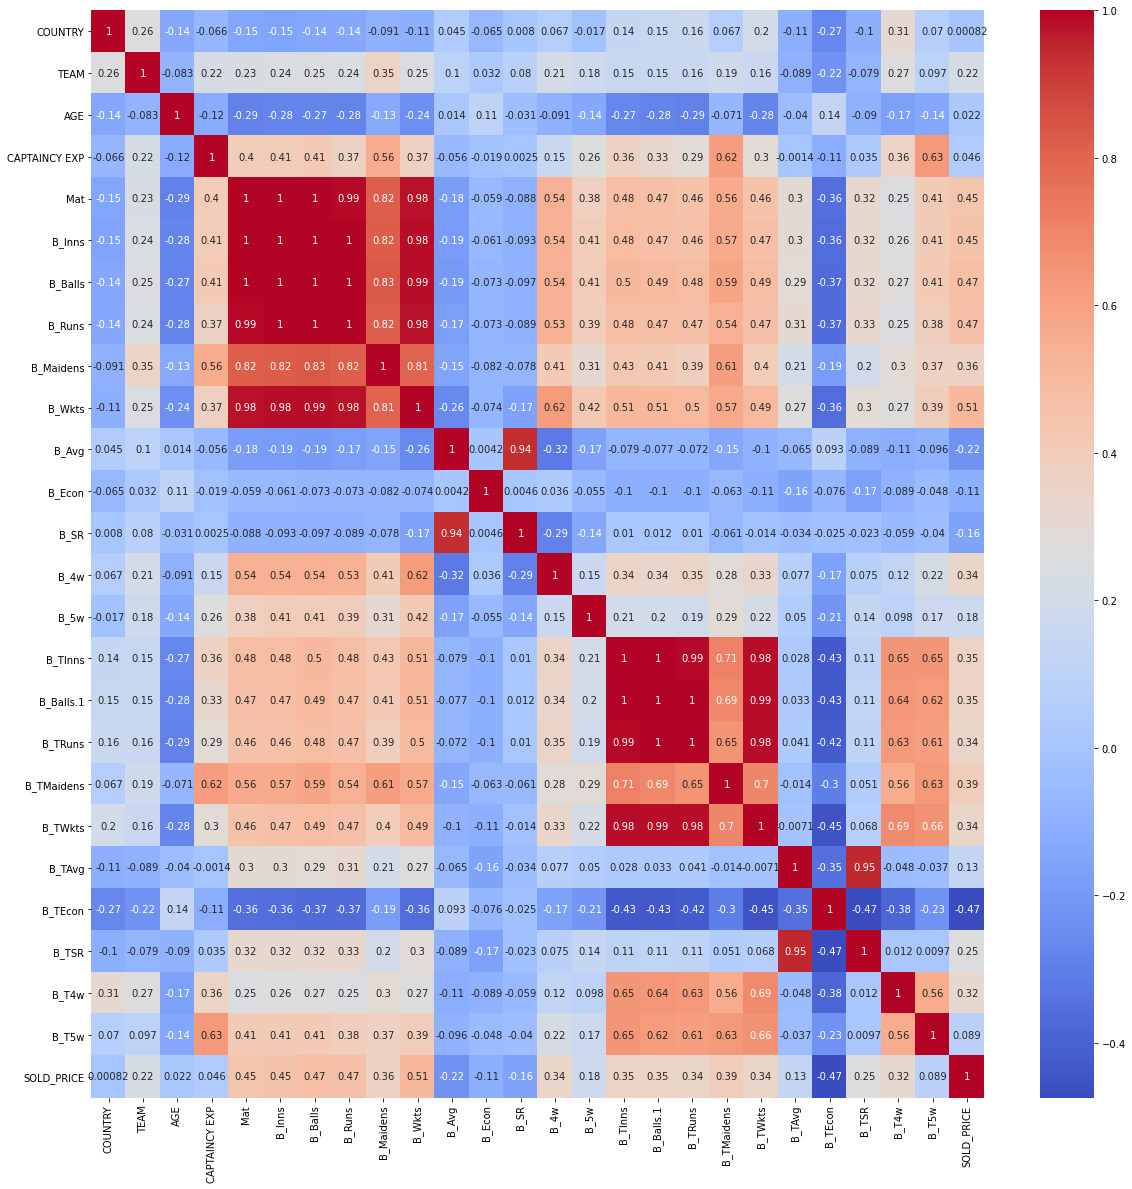

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
df_bowl=pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\Bowling.csv")

df_bowl= df_bowl.drop(['Paying_Role','Star_Rating','POS_x','Inns', 'Runs', 'BF', 'HS', 'Avg', 'SR', 'NO', '4s', '6s', '0s', '50s', '100s', 'TMat', 'TInns', 'TRuns', 'TBF', 'THS', 'TAvg', 'TSR', 'TNO', 'T4s', 'T6s', 'T0s', 'T50s', 'T100s'], axis=1)
df_bowl['COUNTRY'] = df_bowl['COUNTRY'].str.strip()
unique_countries = df_bowl['COUNTRY'].unique()
country_dict = {country: i for i, country in enumerate(unique_countries)}
df_bowl['COUNTRY'] = df_bowl['COUNTRY'].map(country_dict)

unique_team = df_bowl['TEAM'].unique()
team_dict = {team: i for i,team in enumerate(unique_team)}
df_bowl['TEAM'] = df_bowl['TEAM'].map(team_dict)

age_dict = {15: 50, 16: 50, 17: 50, 18: 50, 19: 50, 20: 50, 21: 50, 22: 50,
            23: 100, 24: 100, 25: 100, 26: 100, 27: 100, 28: 100, 29: 100, 30: 100,
            31: 55, 32: 55, 33: 55,
            34: 30, 35: 30, 36: 30, 37: 30, 38: 30, 39: 30, 40: 30, 41: 30, 42: 30}
df_bowl['AGE'] = df_bowl['AGE'].apply(lambda x: age_dict[x])

def convert_units(val):
    if val.endswith('cr'):
        return float(val[:-2]) * 10000000  # 1 crore = 10000000
    elif val.endswith('l'):
        return float(val[:-1]) * 100000  # 1 lakh = 100000
    else:
        return None
df_bowl['SOLD_PRICE'] = df_bowl['SOLD_PRICE'].apply(convert_units)

df_bowl.replace('', np.nan, inplace=True)
df_bowl=df_bowl.sort_values("SOLD_PRICE", ascending=False)
df_bowl=df_bowl.ffill()
df_bowl.to_csv("model_bowl.csv")
corr_matrix = df_bowl.corr()

high_corr = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            high_corr.add(colname)

df_bowl.drop(high_corr, axis=1, inplace=True)


# target_corr = abs(corr_matrix['SOLD_PRICE'])
# high_target_corr = target_corr[target_corr > 0.4]
# low_corr=target_corr[target_corr<-0.4]
# print(high_target_corr,low_corr)
# dfs=df_bat[high_target_corr]
corr_abs = abs(corr_matrix['SOLD_PRICE'])
sorted_corr = corr_abs.sort_values(ascending=False)

# print the sorted correlations
print("Most effecting to least\n",sorted_corr)
plt.figure(figsize=(20,20))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

# ALL ROUNDER PREPROCESSING

Most effecting to least
 SOLD_PRICE       1.000000
Runs             0.644531
6s               0.633998
4s               0.629863
BF               0.629268
Inns             0.625858
B_Inns           0.601011
0s               0.584075
Mat              0.579184
B_Runs           0.573827
B_Wkts           0.548956
B_Balls          0.544582
HS               0.538935
NO               0.513335
B_5w             0.485003
SR               0.477868
B_TInns          0.425629
50s              0.410357
B_Maidens        0.407775
B_Balls.1        0.398702
B_4w             0.390810
B_TRuns          0.363821
TMat             0.357916
B_TMaidens       0.351481
B_TWkts          0.340993
TInns            0.340442
T4s              0.322609
Avg              0.317633
TBF              0.310781
B_T5w            0.300547
TRuns            0.299761
T0s              0.293236
T6s              0.290415
CAPTAINCY EXP    0.287006
TNO              0.280671
T100s            0.210684
B_Avg            0.204071
TEAM         

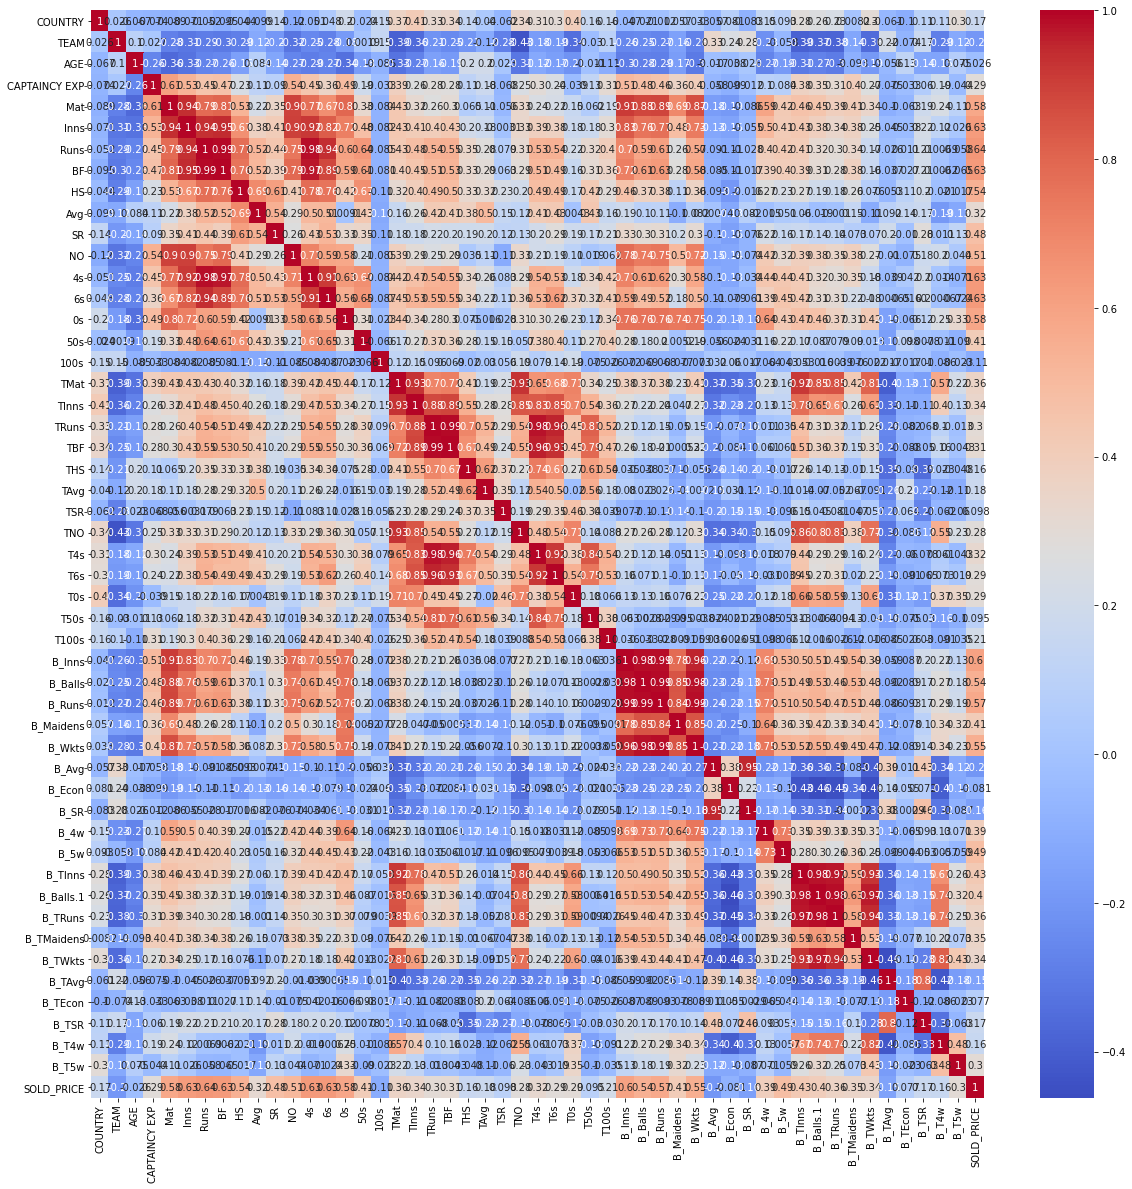

In [10]:
df_all=pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\All rounder.csv")
df_all= df_all.drop(['Paying_Role','Star_Rating','POS_x'], axis=1)

df_all['COUNTRY'] = df_all['COUNTRY'].str.strip()
unique_countries = df_all['COUNTRY'].unique()
country_dict = {country: i for i, country in enumerate(unique_countries)}
df_all['COUNTRY'] = df_all['COUNTRY'].map(country_dict)

unique_team = df_all['TEAM'].unique()
team_dict = {team: i for i,team in enumerate(unique_team)}
df_all['TEAM'] = df_all['TEAM'].map(team_dict)
age_dict = {15: 50, 16: 50, 17: 50, 18: 50, 19: 50, 20: 50, 21: 50, 22: 50,
            23: 100, 24: 100, 25: 100, 26: 100, 27: 100, 28: 100, 29: 100, 30: 100,
            31: 55, 32: 55, 33: 55,
            34: 30, 35: 30, 36: 30, 37: 30, 38: 30, 39: 30, 40: 30, 41: 30, 42: 30}
df_all['AGE'] = df_all['AGE'].apply(lambda x: age_dict[x])

def convert_units(val):
    if val.endswith('cr'):
        return float(val[:-2]) * 10000000  # 1 crore = 10000000
    elif val.endswith('l'):
        return float(val[:-1]) * 100000  # 1 lakh = 100000
    else:
        return None
df_all['SOLD_PRICE'] = df_all['SOLD_PRICE'].apply(convert_units)
df_all.replace('', np.nan, inplace=True)
df_all=df_all.sort_values("SOLD_PRICE", ascending=False)
df_all=df_all.ffill()


df_all.to_csv("model_all.csv")
corr_matrix = df_all.corr()
high_corr = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            high_corr.add(colname)

df_all.drop(high_corr, axis=1, inplace=True)


target_corr = abs(corr_matrix['SOLD_PRICE'])
high_target_corr = target_corr[target_corr > 0.4]
low_corr=target_corr[target_corr<-0.4]
# print(high_target_corr,low_corr)
corr_abs = abs(corr_matrix['SOLD_PRICE'])
sorted_corr = corr_abs.sort_values(ascending=False)

# print the sorted correlations
print("Most effecting to least\n",sorted_corr)
plt.figure(figsize=(20,20))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

# BATSMAN PREDICTION

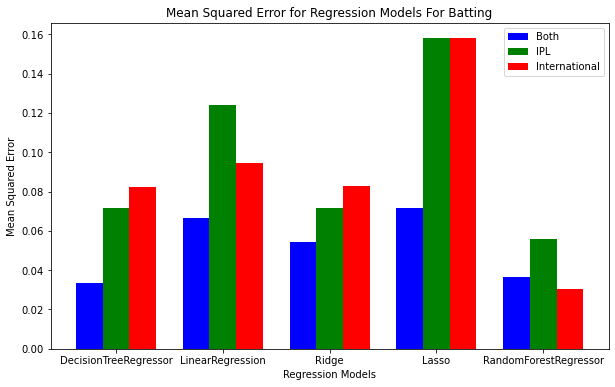

In [11]:
import matplotlib.pyplot as plt

# Set data 
both_data = [0.03324381092833112, 0.06642892019584233, 0.05455403285062114, 0.07165718537854074, 0.036644529039568094 ]
ipl_data = [0.07154273143762867, 0.12390629477102325, 0.07165718537854074, 0.1580339578551891, 0.055877135160493044]
international_data = [0.08239250522982533, 0.09451080250339164, 0.08292574914506448, 0.1580339578551891, 0.03047666175847084]

# Set x-axis labels
labels = ['DecisionTreeRegressor', 'LinearRegression', 'Ridge', 'Lasso', 'RandomForestRegressor']

# Set bar width
width = 0.25

# Set figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar positions
x1 = [0, 1, 2, 3, 4]
x2 = [i + width for i in x1]
x3 = [i + width for i in x2]

# Plot bars
ax.bar(x1, both_data, width, color='blue', label='Both')
ax.bar(x2, ipl_data, width, color='green', label='IPL')
ax.bar(x3, international_data, width, color='red', label='International')

# Set x-axis ticks and labels
ax.set_xticks([i + width for i in range(len(labels))])
ax.set_xticklabels(labels)

# Set plot title and labels
ax.set_title('Mean Squared Error for Regression Models For Batting')
ax.set_xlabel('Regression Models')
ax.set_ylabel('Mean Squared Error')

# Set legend
ax.legend()

# Show plot
plt.show()

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
# load the dataset
df = pd.read_csv("C:\\Users\chitukula shivani\Downloads\model_bat.csv")
target_range = df['SOLD_PRICE'].max() - df['SOLD_PRICE'].min()
target_min = df['SOLD_PRICE'].min()

# Select the columns to be normalized


cols_to_norm =['COUNTRY', 'TEAM', 'AGE', 'CAPTAINCY EXP', 'Mat', 'Inns',
       'Runs', 'BF', 'HS', 'Avg', 'SR', 'NO', '4s', '6s', '0s', '50s', '100s',
       'TMat', 'TInns', 'TRuns', 'TBF', 'THS', 'TAvg', 'TSR', 'TNO', 'T4s',
       'T6s', 'T0s', 'T50s', 'T100s', 'SOLD_PRICE']
# Apply Min-Max scaling to the selected columns
df[cols_to_norm] = (df[cols_to_norm] - df[cols_to_norm].min()) / (df[cols_to_norm].max() - df[cols_to_norm].min())

# split the dataset into training and testing sets
X = df.drop(['Player','SOLD_PRICE','COUNTRY','TEAM','NO','0s','THS','TNO','T0s'], axis=1)
y = df["SOLD_PRICE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# choose a suitable machine learning algorithm and train the model
# LinearRegression()
# Ridge(alpha=0.5)
# Lasso(alpha=0.5)
# DecisionTreeRegressor(max_depth=3)
# RandomForestRegressor(n_estimators=100, max_depth=3)

model1 =DecisionTreeRegressor(max_depth=3)
model1.fit(X_train, y_train)

# evaluate the model's performance on the testing set

# mse = mean_squared_error(y_test, y_pred)
# print("Mean squared error:", mse)


player_name = input("Enter player name: ")

test_data = {
'CAPTAINCY EXP':9,
    'Mat': 109,
    'Inns': 100,
    'Runs': 3889,
    'BF': 2855,
    'HS': 132,
    'Avg': 48.01,
    '4s': 327,
    '6s': 164,
    '50s': 31,
    'TMat': 72,
    'TInns': 68,
    'TRuns': 2265,
    'TBF': 1628,
    'T4s': 191,
    'T50s': 22,
    'SR':136.22,
    'TSR':139.13,
    '100s':4,
    'T100s':2,
    'T6s':99,
    'TAvg':37.75,
    'AGE':100
  
}


# reshape input data to a 2D array
input_data = np.array(list(test_data.values())).reshape(1, -1)

# make a prediction using the trained model

prediction = model1.predict(input_data)
predicted_price = prediction[0] * target_range + target_min


print(f"The predicted value for {player_name} is {predicted_price:.2f}")
y_pred = model1.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
 
print("R-squared:", r2_score(y_test, y_pred))


Enter player name: rahul
The predicted value for rahul is 155000000.00
Mean Squared Error: 0.08239250522982533
Mean Absolute Error: 0.23129251700680273
R-squared: 0.4599879752771321


# BOWLER PREDICTION

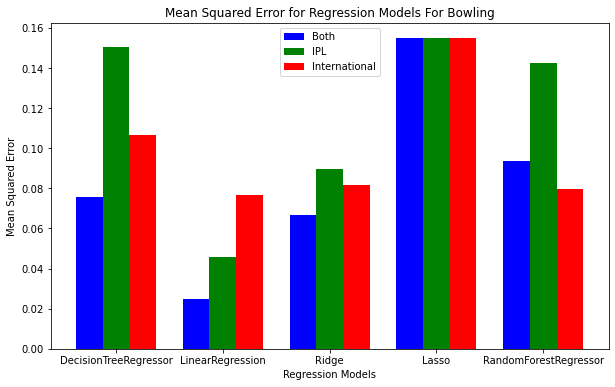

In [13]:
import matplotlib.pyplot as plt

# Set data 
both_data = [0.07560497533607032,0.024986477547949745,0.06665736839747796,0.15489782436509383,0.09348959882144954]
ipl_data = [0.15026251376980018,0.04560749852995467,0.08941017232525152,0.15489782436509383,0.14269468138626135]
international_data = [0.10638575686728631,0.0765068120899166,0.08167557340765391,0.15489782436509383,0.07977401120430798]

# Set x-axis labels
labels = ['DecisionTreeRegressor', 'LinearRegression', 'Ridge', 'Lasso', 'RandomForestRegressor']

# Set bar width
width = 0.25

# Set figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar positions
x1 = [0, 1, 2, 3, 4]
x2 = [i + width for i in x1]
x3 = [i + width for i in x2]

# Plot bars
ax.bar(x1, both_data, width, color='blue', label='Both')
ax.bar(x2, ipl_data, width, color='green', label='IPL')
ax.bar(x3, international_data, width, color='red', label='International')

# Set x-axis ticks and labels
ax.set_xticks([i + width for i in range(len(labels))])
ax.set_xticklabels(labels)

# Set plot title and labels
ax.set_title('Mean Squared Error for Regression Models For Bowling')
ax.set_xlabel('Regression Models')
ax.set_ylabel('Mean Squared Error')

# Set legend
ax.legend()

# Show plot
plt.show()

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.naive_bayes import GaussianNB

df=pd.read_csv("C:\\Users\chitukula shivani\Downloads\model_bowl.csv")
# print(df.columns)
# print(df)
target_range = df['SOLD_PRICE'].max() - df['SOLD_PRICE'].min()
target_min = df['SOLD_PRICE'].min()

cols_to_norm =[ 'COUNTRY', 'TEAM', 'AGE', 'CAPTAINCY EXP', 'Mat', 'B_Inns',
       'B_Balls', 'B_Runs', 'B_Maidens', 'B_Wkts', 'B_Avg', 'B_Econ', 'B_SR',
       'B_4w', 'B_5w', 'B_TInns', 'B_Balls.1', 'B_TRuns', 'B_TMaidens',
       'B_TWkts', 'B_TAvg', 'B_TEcon', 'B_TSR', 'B_T4w', 'B_T5w',
       'SOLD_PRICE']
# Apply Min-Max scaling to the selected columns
df[cols_to_norm] = (df[cols_to_norm] - df[cols_to_norm].min()) / (df[cols_to_norm].max() - df[cols_to_norm].min())



X = df.drop(['Player', 'COUNTRY', 'TEAM','B_Avg', 'B_SR','B_TAvg', 'B_TSR', 'B_T4w', 'B_T5w','B_4w','B_5w' ,'SOLD_PRICE'], axis=1)
y = df["SOLD_PRICE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# LinearRegression()
# Ridge(alpha=0.5)
# Lasso(alpha=0.5)
# DecisionTreeRegressor(max_depth=3)
# RandomForestRegressor(n_estimators=100, max_depth=3)

model2 = RandomForestRegressor(n_estimators=100, max_depth=2)
model2.fit(X_train, y_train)
player_name = input("Enter player name: ")
# CAPTAINCY EXP	Mat	B_Inns	B_Balls	B_Runs	B_Maidens	B_Wkts	B_Econ	
#	B_TInns	B_Balls.1	B_TRuns	B_TMaidens	B_TWkts	B_TEcon		SOLD_PRICE
test_data={
    'CAPTAINCY EXP':0,
    'Mat': 120,
    'B_Inns': 120,
    'B_Balls': 2742,
    'B_Runs': 3380,
    'B_Maidens': 7,
    'B_Wkts': 145,
    'B_Econ': 7.4,
    'AGE':100,
    
    'B_TInns':59,
    'B_Balls.1':1283,
    'B_TRuns':1416,
    'B_TMaidens':9,
    'B_TWkts':70,
    'B_TEcon':6.62
}

input_data = np.array(list(test_data.values())).reshape(1, -1)

# make a prediction using the trained model
prediction = model2.predict(input_data)
predicted_price = prediction[0] * target_range + target_min
print(f"The predicted value for {player_name} is {predicted_price:.2f}")
y_pred = model2.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Enter player name: bhuvi
The predicted value for bhuvi is 39934427.19
Mean Squared Error: 0.09020378247956047
Mean Absolute Error: 0.2315150889961186
R-squared: 0.3376826489109752


# ALL ROUNDER PREDICTION

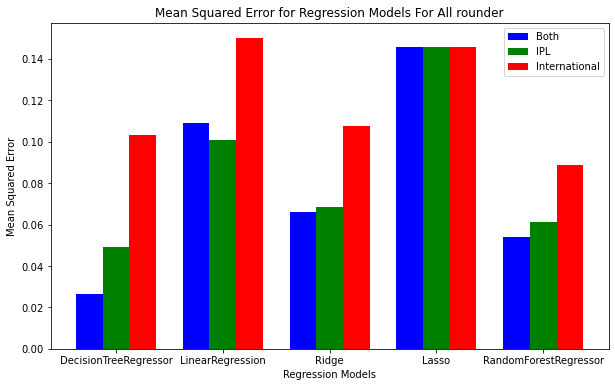

In [15]:
import matplotlib.pyplot as plt

# Set data 
both_data = [0.02649940664234476,0.10907607823158011,0.06581786003060226,0.14577584657434825,0.05421702809061187]
ipl_data = [0.04915985292441676,0.10106149219141458,0.06850026678764554,0.14577584657434825,0.06143960109591701]
international_data = [0.10310819869089381,0.14999000892105083,0.10766721044513816,0.14577584657434825,0.08884772261292906]

# Set x-axis labels
labels = ['DecisionTreeRegressor', 'LinearRegression', 'Ridge', 'Lasso', 'RandomForestRegressor']

# Set bar width
width = 0.25

# Set figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar positions
x1 = [0, 1, 2, 3, 4]
x2 = [i + width for i in x1]
x3 = [i + width for i in x2]

# Plot bars
ax.bar(x1, both_data, width, color='blue', label='Both')
ax.bar(x2, ipl_data, width, color='green', label='IPL')
ax.bar(x3, international_data, width, color='red', label='International')

# Set x-axis ticks and labels
ax.set_xticks([i + width for i in range(len(labels))])
ax.set_xticklabels(labels)

# Set plot title and labels
ax.set_title('Mean Squared Error for Regression Models For All rounder')
ax.set_xlabel('Regression Models')
ax.set_ylabel('Mean Squared Error')

# Set legend
ax.legend()

# Show plot
plt.show()

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

df=pd.read_csv("C:\\Users\chitukula shivani\Downloads\model_all.csv")
target_range = df['SOLD_PRICE'].max() - df['SOLD_PRICE'].min()
target_min = df['SOLD_PRICE'].min()
# print(df.columns)
cols_to_norm =[ 'COUNTRY', 'TEAM', 'AGE', 'CAPTAINCY EXP', 'Mat', 'Inns',
       'Runs', 'BF', 'HS', 'Avg', 'SR', 'NO', '4s', '6s', '0s', '50s', '100s',
       'TMat', 'TInns', 'TRuns', 'TBF', 'THS', 'TAvg', 'TSR', 'TNO', 'T4s',
       'T6s', 'T0s', 'T50s', 'T100s', 'B_Inns', 'B_Balls', 'B_Runs',
       'B_Maidens', 'B_Wkts', 'B_Avg', 'B_Econ', 'B_SR', 'B_4w', 'B_5w',
       'B_TInns', 'B_Balls.1', 'B_TRuns', 'B_TMaidens', 'B_TWkts', 'B_TAvg',
       'B_TEcon', 'B_TSR', 'B_T4w', 'B_T5w', 'SOLD_PRICE']
# Apply Min-Max scaling to the selected columns
df[cols_to_norm] = (df[cols_to_norm] - df[cols_to_norm].min()) / (df[cols_to_norm].max() - df[cols_to_norm].min())

X = df.drop(['Player','SOLD_PRICE','COUNTRY','TEAM','NO','0s','THS','TNO','T0s','B_Avg', 'B_SR','B_TAvg', 'B_TSR', 'B_T4w', 'B_T5w','B_4w','B_5w'], axis=1)
y = df["SOLD_PRICE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# LinearRegression()
# Ridge(alpha=0.5)
# Lasso(alpha=0.5)
# DecisionTreeRegressor(max_depth=3)
# RandomForestRegressor(n_estimators=100, max_depth=3)
model3 = RandomForestRegressor(n_estimators=100, max_depth=3)
model3.fit(X_train, y_train)

player_name = input("Enter player name: ")
# print(X.columns)
test_data={
    'CAPTAINCY EXP':1,
    'AGE':30,
    'Mat': 210,
    'Inns': 161,
    'Runs': 2502,
    'BF': 1960,
    'HS': 62,
    'Avg':26.62,
    'SR': 127.65,

    '4s': 182,
    '6s': 90,
    '50s': 2,
    '100s':0,
    'TMat':64,
    'TInns':34,
    'TRuns':457,
    'TBF':367,
    'TAvg':24.05,
    'TSR':124.52,
    'T4s':34,
    'T6s':12,
    'T50s':0,
    'T100s':0,

    'B_Inns': 45,
    'B_Balls': 600,
    'B_Runs': 700,
    'B_Maidens': 4,
    'B_Wkts': 20,
    'B_Econ':7.61,
    'B_TInns': 60,
    'B_Balls.1':1237,
    'B_TRuns':1453,
    'B_TMaidens':4,
    'B_TWkts':51,
    'B_TEcon':7.05
    
    
}


input_data = np.array(list(test_data.values())).reshape(1,-1)

# make a prediction using the trained model
prediction = model3.predict(input_data)
predicted_price = prediction[0] * target_range + target_min
print(f"The predicted value for {player_name} is {predicted_price:.2f}")
y_pred = model3.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Enter player name: hardik
The predicted value for hardik is 124407317.46
Mean Squared Error: 0.05491755615261431
Mean Absolute Error: 0.1790780895584383
R-squared: 0.5992877377340236


# TOP 5 BATSMAN

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
# load the dataset
df = pd.read_csv("C:\\Users\chitukula shivani\Downloads\model_bat.csv")

df2=df.bfill()

# split the dataset into training and testing sets
X = df.drop(['Player','SOLD_PRICE'], axis=1)
y = df["SOLD_PRICE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# choose a suitable machine learning algorithm and train the model
model = RandomForestRegressor(n_estimators=100,max_depth=3)
model.fit(X_train, y_train)

test_data = pd.read_csv("C:\\Users\chitukula shivani\Downloads\model_bat.csv")
# Prepare the test data
X_test = test_data.drop(['Player', 'SOLD_PRICE'], axis=1) # remove the player names


# Predict the prices
test_data['Predicted_Price'] = model.predict(X_test)
test_data['Predicted_Price'] = test_data['Predicted_Price'].astype(int)

# Sort the players by predicted price
top_international = test_data[test_data['COUNTRY'] != 0].sort_values('Predicted_Price', ascending=False).head(5)
top_national = test_data[test_data['COUNTRY'] == 0].sort_values('Predicted_Price', ascending=False).head(5)

# Print the top players
print("Top 5 International Batsmen:")
print(top_international[['Player', 'Predicted_Price']])
print("\nTop 5 National Batsmen:")
print(top_national[['Player', 'Predicted_Price']])

Top 5 International Batsmen:
             Player  Predicted_Price
24     David Warner         95739664
5   Kane Williamson         95234691
10      Jos Buttler         92843837
20   Faf Du Plessis         81113651
21  Quinton De Kock         80679571

Top 5 National Batsmen:
         Player  Predicted_Price
2  Rohit Sharma        137173482
3   Virat Kohli        134269007
1  Rishabh Pant        111230782
4  Sanju Samson        110610420
8      MS Dhoni        110415636


# TOP 5 BOWLERS

In [18]:
from sklearn.tree import DecisionTreeRegressor

df=pd.read_csv("C:\\Users\chitukula shivani\Downloads\model_bowl.csv")
X = df.drop(['Player','SOLD_PRICE'], axis=1)
y = df["SOLD_PRICE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model2 = RandomForestRegressor(n_estimators=100, max_depth=3)
model2.fit(X_train, y_train)

test_data = pd.read_csv("C:\\Users\chitukula shivani\Downloads\model_bowl.csv")
X_test = test_data.drop(['Player', 'SOLD_PRICE'], axis=1) # remove the player names

# Predict the prices
test_data['Predicted_Price'] = model2.predict(X_test)
test_data['Predicted_Price'] = test_data['Predicted_Price'].astype(int)


# Sort the players by predicted price
top_international = test_data[test_data['COUNTRY'] != 1].sort_values('Predicted_Price', ascending=False).head(5)
top_national = test_data[test_data['COUNTRY'] == 1].sort_values('Predicted_Price', ascending=False).head(5)

# Print the top players
print("Top 5 International Bowlers:")
print(top_international[['Player', 'Predicted_Price']])
print("\nTop 5 National Bowlers:")
print(top_national[['Player', 'Predicted_Price']])

Top 5 International Bowlers:
             Player  Predicted_Price
4     Kagiso Rabada         72637997
1   Lockie Ferguson         58578155
10    Anrich Nortje         54259688
7    Josh Hazlewood         52696143
5       Trent Boult         52449137

Top 5 National Bowlers:
                 Player  Predicted_Price
2            Avesh Khan         74566931
3       Prasidh Krishna         70570363
13        Khaleel Ahmed         66568769
11       Mohammad Shami         57760338
6   Varun Chakaravarthy         56728687


# TOP 5 ALL ROUNDERS

In [19]:
from sklearn.ensemble import RandomForestRegressor

df=pd.read_csv("C:\\Users\chitukula shivani\Downloads\model_all.csv")
X = df.drop(['Player','SOLD_PRICE'], axis=1)
y = df["SOLD_PRICE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model3 = RandomForestRegressor(n_estimators=100,max_depth=3)
model3.fit(X_train, y_train)

test_data = pd.read_csv("C:\\Users\chitukula shivani\Downloads\model_all.csv")
X_test = test_data.drop(['Player', 'SOLD_PRICE'], axis=1) # remove the player names

# Predict the prices
test_data['Predicted_Price'] = model3.predict(X_test)
test_data['Predicted_Price'] = test_data['Predicted_Price'].astype(int)

# Sort the players by predicted price
top_international = test_data[test_data['COUNTRY'] != 0].sort_values('Predicted_Price', ascending=False).head(5)
top_national = test_data[test_data['COUNTRY'] == 0].sort_values('Predicted_Price', ascending=False).head(5)

# Print the top players
print("Top 5 International All rounders:")
print(top_international[['Player', 'Predicted_Price']])
print("\nTop 5 National All Rounders:")
print(top_national[['Player', 'Predicted_Price']])

Top 5 International All rounders:
            Player  Predicted_Price
3      Rashid Khan        124894384
4    Andre Russell        109737102
6    Glenn Maxwell        106790789
10  Marcus Stoinis         90584204
28    Dwayne Bravo         81945900

Top 5 National All Rounders:
            Player  Predicted_Price
2    Hardik Pandya        129966019
1     Ishan Kishan        129707427
0  Ravindra Jadeja        109506672
7    Harshal Patel         89468008
9   Shardul Thakur         88959327


# Analyzing National and International players



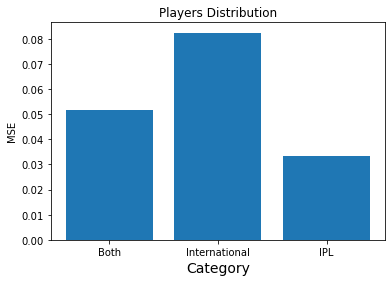

In [20]:
import matplotlib.pyplot as plt

# Data
values = [0.05154273143762867,  0.08239250522982533,0.03324381092833112]
labels = ['Both', 'International', 'IPL']

# Create the plot
plt.bar(labels, values)

# Add labels
plt.title('Players Distribution')
plt.xlabel('Category',fontsize=14)
plt.ylabel('MSE')

# Show the plot
plt.show()


In [102]:
!pip install wordcloud


In [106]:

!pip install matplotlib==3.2.2

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\chitukula shivani\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
    yield
  File "C:\Users\chitukula shivani\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\chitukula shivani\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\chitukula shivani\anaconda3\lib\http\client.py", line 458, in read
    n = self.readinto(b)
  File "C:\Users\chitukula shivani\anaconda3\lib\http\client.py", line 502, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\chitukula shivani\anaconda3\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\chitukula shivani\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\chitukula

  File "C:\Users\chitukula shivani\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 442, in _error_catcher
    raise ReadTimeoutError(self._pool, None, "Read timed out.")
pip._vendor.urllib3.exceptions.ReadTimeoutError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Read timed out.


In [5]:
!pip uninstall -y pillow
!pip install pillow


Found existing installation: Pillow 8.0.1
Uninstalling Pillow-8.0.1:
  Successfully uninstalled Pillow-8.0.1


In [ ]:
!pip uninstall wordcloud
!pip install wordcloud

IND    118
WI      14
AUS     14
SA      11
NZ       9
ENG      8
SL       5
AFG      2
BAN      1
Name: COUNTRY, dtype: int64


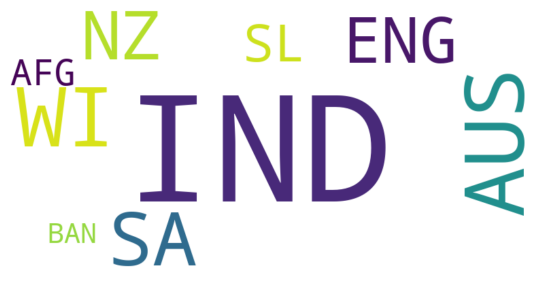

In [8]:

import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\IPL dataset forp (1).csv")
country_freq = data['COUNTRY'].value_counts()

# print the frequency of each country
print(country_freq)

# Combine all text in the column into a single string
text = " ".join(review for review in data.COUNTRY)

# Remove punctuation and stopwords from the text
stopwords = set(STOPWORDS)
text = " ".join(word for word in text.split() if word not in stopwords)

# Generate the word cloud image
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [1]:

import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("C:\\Users\chitukula shivani\Downloads\country.csv")
country_freq = data['COUNTRY'].value_counts()

# print the frequency of each country
print(country_freq)

# Combine all text in the column into a single string
text = " ".join(review for review in data.COUNTRY)

# Remove punctuation and stopwords from the text
stopwords = set(STOPWORDS)
text = " ".join(word for word in text.split() if word not in stopwords)

# # Generate the word cloud image
# wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# # Display the generated image
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()


C:\Users\chitukula shivani\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


IND    82
AUS    21
SA     13
WI      8
NZ      5
ENG     5
SL      1
BAN     1
Name: COUNTRY, dtype: int64


In [2]:
import pandas as pd
df = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\country_16.csv")

d = {}
# Iterate over the rows of the dataframe
for index, row in df.iterrows():
    # Extract values from the desired columns
    key = row['Player']
    value = row['COUNTRY']
    
    # Add key-value pair to the dictionary
    d[key] = value
# print(d)

df1=pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BATTING STATS - IPL_2017.csv")
df1['COUNTRY'] = df1['Player'].map(d)
df1.to_csv("country_17.csv",index=False)

In [4]:
import pandas as pd
df = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\country_17.csv")

d = {}
# Iterate over the rows of the dataframe
for index, row in df.iterrows():
    # Extract values from the desired columns
    key = row['Player']
    value = row['COUNTRY']
    
    # Add key-value pair to the dictionary
    d[key] = value
# print(d)

df1=pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BATTING STATS - IPL_2018.csv")
df1['COUNTRY'] = df1['Player'].map(d)
df1.to_csv("country_18.csv",index=False)

In [5]:
import pandas as pd
df = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\country_18.csv")

d = {}
# Iterate over the rows of the dataframe
for index, row in df.iterrows():
    # Extract values from the desired columns
    key = row['Player']
    value = row['COUNTRY']
    
    # Add key-value pair to the dictionary
    d[key] = value
# print(d)

df1=pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BATTING STATS - IPL_2019.csv")
df1['COUNTRY'] = df1['Player'].map(d)
df1.to_csv("country_19.csv",index=False)

In [6]:
import pandas as pd
df = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\country_19.csv")

d = {}
# Iterate over the rows of the dataframe
for index, row in df.iterrows():
    # Extract values from the desired columns
    key = row['Player']
    value = row['COUNTRY']
    
    # Add key-value pair to the dictionary
    d[key] = value
# print(d)

df1=pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BATTING STATS - IPL_2020.csv")
df1['COUNTRY'] = df1['Player'].map(d)
df1.to_csv("country_20.csv",index=False)

In [7]:
import pandas as pd
df = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\country_20.csv")

d = {}
# Iterate over the rows of the dataframe
for index, row in df.iterrows():
    # Extract values from the desired columns
    key = row['Player']
    value = row['COUNTRY']
    
    # Add key-value pair to the dictionary
    d[key] = value
# print(d)

df1=pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BATTING STATS - IPL_2021.csv")
df1['COUNTRY'] = df1['Player'].map(d)
df1.to_csv("country_21.csv",index=False)

In [8]:
import pandas as pd
df = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\IPL dataset forp (1).csv")

d = {}
# Iterate over the rows of the dataframe
for index, row in df.iterrows():
    # Extract values from the desired columns
    key = row['Player']
    value = row['COUNTRY']
    
    # Add key-value pair to the dictionary
    d[key] = value
# print(d)

df1=pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BATTING STATS - IPL_2022.csv")
df1['COUNTRY'] = df1['Player'].map(d)
df1.to_csv("country_22.csv",index=False)

In [16]:
df1 = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\country_16.csv")
df2 = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\country_17.csv")
df3 = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\country_18.csv")
df4 = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\country_19.csv")
df5 = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\country_20.csv")
df6 = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\country_21.csv")
df7 = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\country_22.csv")

import pandas as pd

import matplotlib.pyplot as plt

# Load the data
f1 = df1['COUNTRY'].value_counts()
# print the frequency of each country
print("2016",f1)
f2 = df2['COUNTRY'].value_counts()
# print the frequency of each country
print("2017",f2)
f3 = df3['COUNTRY'].value_counts()
# print the frequency of each country
print("2018",f3)
f4 = df4['COUNTRY'].value_counts()
# print the frequency of each country
print("2019",f4)
f5 = df5['COUNTRY'].value_counts()
# print the frequency of each country
print("2020",f5)
f6 = df6['COUNTRY'].value_counts()
# print the frequency of each country
print("2021",f6)
f7 = df7['COUNTRY'].value_counts()
# print the frequency of each country
print("2022",f7)

2016 IND    82
AUS    21
SA     13
WI      8
NZ      5
ENG     5
SL      1
BAN     1
Name: COUNTRY, dtype: int64
2017 IND    87
AUS    19
NZ     10
ENG     8
SA      7
WI      7
SL      2
AFG     2
BAN     1
Name: COUNTRY, dtype: int64
2018 IND    88
AUS    11
ENG    11
NZ      8
SA      8
WI      7
AFG     3
BAN     2
Name: COUNTRY, dtype: int64
2019 IND    92
WI     12
ENG    10
AUS     9
SA      9
NZ      8
AFG     3
BAN     1
Name: COUNTRY, dtype: int64
2020 IND    84
AUS    14
ENG    10
WI      9
SA      8
NZ      4
AFG     3
SL      1
Name: COUNTRY, dtype: int64
2021 IND    89
AUS    13
ENG    13
WI     10
SA      9
NZ      9
AFG     3
BAN     2
SL      1
Name: COUNTRY, dtype: int64
2022 IND    100
WI      15
AUS     12
SA      11
NZ      10
ENG      7
SL       4
AFG      2
BAN      1
Name: COUNTRY, dtype: int64


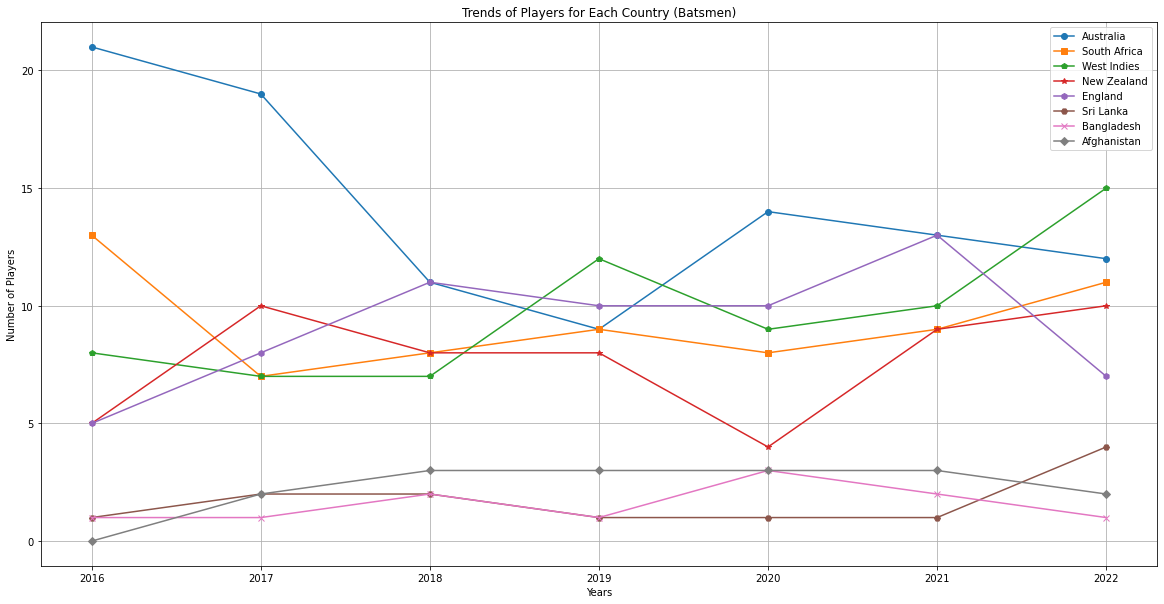

In [3]:
import matplotlib.pyplot as plt

# Define the years and player counts for each country
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
india_players = [82, 87, 88, 92, 84, 89, 100]
australia_players = [21, 19, 11, 9, 14, 13, 12]
southafrica_players = [13, 7, 8, 9, 8, 9, 11]
westindies_players = [8, 7, 7, 12, 9, 10, 15]
newzealand_players = [5, 10, 8, 8, 4, 9, 10]
england_players = [5, 8, 11, 10, 10, 13, 7]
srilanka_players = [1, 2, 2, 1, 1, 1, 4]
bangladesh_players = [1, 1, 2, 1, 3, 2, 1]
afghanistan_players = [0, 2, 3, 3, 3, 3, 2]
plt.figure(figsize=(20, 10))

# Plotting the trends for each country
# plt.plot(years, india_players, label='India')
plt.plot(years, australia_players, label='Australia',marker='o')
plt.plot(years, southafrica_players, label='South Africa',marker='s')
plt.plot(years, westindies_players, label='West Indies',marker='p')
plt.plot(years, newzealand_players, label='New Zealand',marker='*')
plt.plot(years, england_players, label='England',marker='h')
plt.plot(years, srilanka_players, label='Sri Lanka',marker='H')
plt.plot(years, bangladesh_players, label='Bangladesh',marker='x')
plt.plot(years, afghanistan_players, label='Afghanistan',marker='D')

# Set the labels and title
plt.xlabel('Years')
plt.ylabel('Number of Players')
plt.title('Trends of Players for Each Country (Batsmen)')
plt.grid(True)
# Add a legend
plt.legend()

# Display the plot
plt.show()


#BOWLING (TRENDS)

In [42]:
import pandas as pd
df = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\IPL dataset forp (1).csv")

d = {}
# Iterate over the rows of the dataframe
for index, row in df.iterrows():
    # Extract values from the desired columns
    key = row['Player']
    value = row['COUNTRY']
    
    # Add key-value pair to the dictionary
    d[key] = value
# print(d)

df1=pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BOWLING STATS - IPL_2022.csv")
df1['COUNTRY'] = df1['Player'].map(d)
df1.to_csv("countryb_22.csv",index=False)

In [46]:
import pandas as pd
df = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\country_21.csv")

d = {}
# Iterate over the rows of the dataframe
for index, row in df.iterrows():
    # Extract values from the desired columns
    key = row['Player']
    value = row['COUNTRY']
    
    # Add key-value pair to the dictionary
    d[key] = value
# print(d)

df1=pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BOWLING STATS - IPL_2021.csv")
df1['COUNTRY'] = df1['Player'].map(d)
df1.to_csv("countryb_21.csv",index=False)
e = df1['COUNTRY'].isnull().sum()

# Print the result
print(e)

13


In [47]:
import pandas as pd
df = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\country_20.csv")

d = {}
# Iterate over the rows of the dataframe
for index, row in df.iterrows():
    # Extract values from the desired columns
    key = row['Player']
    value = row['COUNTRY']
    
    # Add key-value pair to the dictionary
    d[key] = value
# print(d)

df1=pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BOWLING STATS - IPL_2020.csv")
df1['COUNTRY'] = df1['Player'].map(d)
df1.to_csv("countryb_20.csv",index=False)
e = df1['COUNTRY'].isnull().sum()

# Print the result
print(e)

11


In [48]:
import pandas as pd
df = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\country_19.csv")

d = {}
# Iterate over the rows of the dataframe
for index, row in df.iterrows():
    # Extract values from the desired columns
    key = row['Player']
    value = row['COUNTRY']
    
    # Add key-value pair to the dictionary
    d[key] = value
# print(d)

df1=pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BOWLING STATS - IPL_2019.csv")
df1['COUNTRY'] = df1['Player'].map(d)
df1.to_csv("countryb_19.csv",index=False)
e = df1['COUNTRY'].isnull().sum()

# Print the result
print(e)

16


In [49]:
import pandas as pd
df = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\country_18.csv")

d = {}
# Iterate over the rows of the dataframe
for index, row in df.iterrows():
    # Extract values from the desired columns
    key = row['Player']
    value = row['COUNTRY']
    
    # Add key-value pair to the dictionary
    d[key] = value
# print(d)

df1=pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BOWLING STATS - IPL_2018.csv")
df1['COUNTRY'] = df1['Player'].map(d)
df1.to_csv("countryb_18.csv",index=False)
e = df1['COUNTRY'].isnull().sum()

# Print the result
print(e)

7


In [50]:
import pandas as pd
df = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\country_17.csv")

d = {}
# Iterate over the rows of the dataframe
for index, row in df.iterrows():
    # Extract values from the desired columns
    key = row['Player']
    value = row['COUNTRY']
    
    # Add key-value pair to the dictionary
    d[key] = value
# print(d)

df1=pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BOWLING STATS - IPL_2017.csv")
df1['COUNTRY'] = df1['Player'].map(d)
df1.to_csv("countryb_17.csv",index=False)
e = df1['COUNTRY'].isnull().sum()

# Print the result
print(e)

10


In [51]:
import pandas as pd
df = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\country_16.csv")

d = {}
# Iterate over the rows of the dataframe
for index, row in df.iterrows():
    # Extract values from the desired columns
    key = row['Player']
    value = row['COUNTRY']
    
    # Add key-value pair to the dictionary
    d[key] = value
# print(d)

df1=pd.read_csv("C:\\Users\chitukula shivani\OneDrive\Desktop\ipldataset\BOWLING STATS - IPL_2016.csv")
df1['COUNTRY'] = df1['Player'].map(d)
df1.to_csv("countryb_16.csv",index=False)
e = df1['COUNTRY'].isnull().sum()

# Print the result
print(e)

16


In [52]:
df1 = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\countryb_16.csv")
df2 = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\countryb_17.csv")
df3 = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\countryb_18.csv")
df4 = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\countryb_19.csv")
df5 = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\countryb_20.csv")
df6 = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\countryb_21.csv")
df7 = pd.read_csv("C:\\Users\\chitukula shivani\\Downloads\\countryb_22.csv")

import pandas as pd

import matplotlib.pyplot as plt

# Load the data
f1 = df1['COUNTRY'].value_counts()
# print the frequency of each country
print("2016",f1)
f2 = df2['COUNTRY'].value_counts()
# print the frequency of each country
print("2017",f2)
f3 = df3['COUNTRY'].value_counts()
# print the frequency of each country
print("2018",f3)
f4 = df4['COUNTRY'].value_counts()
# print the frequency of each country
print("2019",f4)
f5 = df5['COUNTRY'].value_counts()
# print the frequency of each country
print("2020",f5)
f6 = df6['COUNTRY'].value_counts()
# print the frequency of each country
print("2021",f6)
f7 = df7['COUNTRY'].value_counts()
# print the frequency of each country
print("2022",f7)

2016 IND    52
AUS    13
WI      7
SA      6
NZ      3
BAN     2
ENG     2
SL      1
Name: COUNTRY, dtype: int64
2017 IND    56
AUS    14
NZ      8
SA      3
ENG     3
WI      3
AFG     2
SL      1
Name: COUNTRY, dtype: int64
2018 IND    48
AUS     9
ENG     7
NZ      6
WI      4
AFG     3
SA      3
BAN     2
Name: COUNTRY, dtype: int64
2019 IND    54
WI      7
NZ      7
SA      5
ENG     5
AUS     4
AFG     3
SL      1
BAN     1
Name: COUNTRY, dtype: int64
2020 IND    46
AUS     8
SA      6
ENG     6
WI      6
NZ      4
AFG     1
SL      1
Name: COUNTRY, dtype: int64
2021 IND    47
AUS    12
NZ      7
WI      6
SA      6
ENG     6
AFG     3
BAN     2
Name: COUNTRY, dtype: int64
2022 IND    61
AUS    10
WI     10
SA      6
ENG     5
SL      4
NZ      4
AFG     2
BAN     1
Name: COUNTRY, dtype: int64


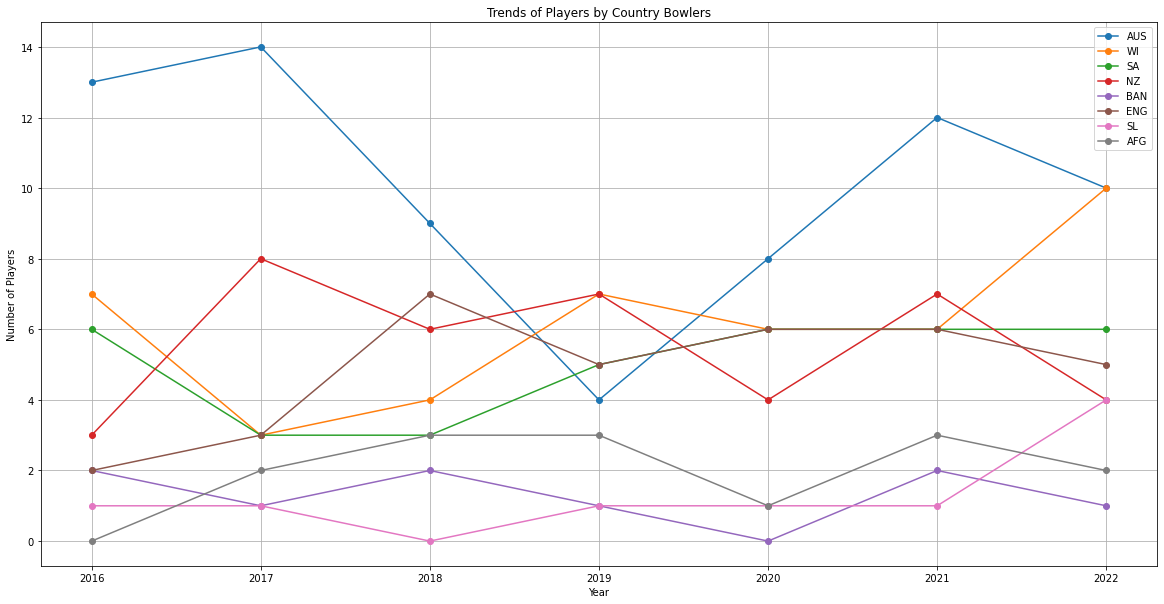

In [4]:
import matplotlib.pyplot as plt

# Years
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Country data
data = {
#     'IND': [52, 56, 48, 54, 46, 47, 61],
    'AUS': [13, 14, 9, 4, 8, 12, 10],
    'WI': [7, 3, 4, 7, 6, 6, 10],
    'SA': [6, 3, 3, 5, 6, 6, 6],
    'NZ': [3, 8, 6, 7, 4, 7, 4],
    'BAN': [2, 1, 2, 1, 0, 2, 1],
    'ENG': [2, 3, 7, 5, 6, 6, 5],
    'SL': [1, 1, 0, 1, 1, 1, 4],
    'AFG': [0, 2, 3, 3, 1, 3, 2]
}

# Plotting
plt.figure(figsize=(20, 10))  # Set the figure size

# Iterate over each country's data
for country, values in data.items():
    plt.plot(years, values, marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Number of Players')
plt.title('Trends of Players by Country (Bowlers')
plt.legend()
plt.grid(True)
plt.show()


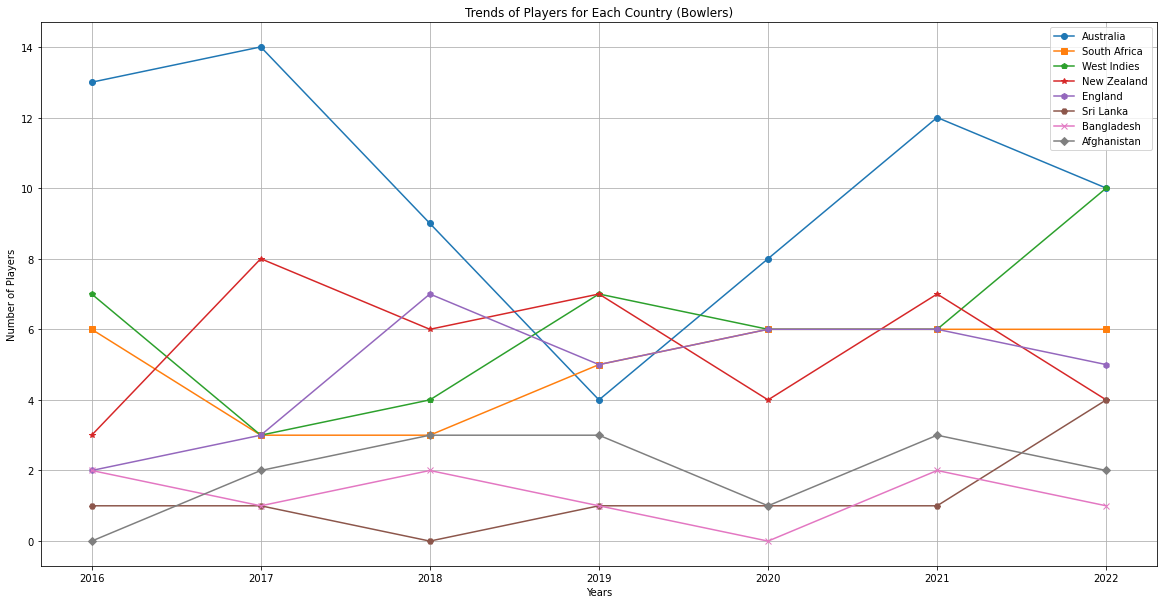

In [1]:
import matplotlib.pyplot as plt

# Define the years and player counts for each country
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
india_players =[52, 56, 48, 54, 46, 47, 61]
australia_players = [13, 14, 9, 4, 8, 12, 10]
southafrica_players = [6, 3, 3, 5, 6, 6, 6]
westindies_players = [7, 3, 4, 7, 6, 6, 10]
newzealand_players = [3, 8, 6, 7, 4, 7, 4]
england_players = [2, 3, 7, 5, 6, 6, 5]
srilanka_players = [1, 1, 0, 1, 1, 1, 4]
bangladesh_players = [2, 1, 2, 1, 0, 2, 1]
afghanistan_players = [0, 2, 3, 3, 1, 3, 2]
plt.figure(figsize=(20, 10))

# Plotting the trends for each country
# plt.plot(years, india_players, label='India')
plt.plot(years, australia_players, label='Australia',marker='o')
plt.plot(years, southafrica_players, label='South Africa',marker='s')
plt.plot(years, westindies_players, label='West Indies',marker='p')
plt.plot(years, newzealand_players, label='New Zealand',marker='*')
plt.plot(years, england_players, label='England',marker='h')
plt.plot(years, srilanka_players, label='Sri Lanka',marker='H')
plt.plot(years, bangladesh_players, label='Bangladesh',marker='x')
plt.plot(years, afghanistan_players, label='Afghanistan',marker='D')

# Set the labels and title
plt.xlabel('Years')
plt.ylabel('Number of Players')
plt.title('Trends of Players for Each Country (Bowlers)')

# Add a legend
plt.legend()
plt.grid(True)
# Display the plot
plt.show()


In [5]:
import matplotlib
print(matplotlib.__version__)


3.3.2
